## Assignment Details:

- DSC550-T301 Data Mining (2251-1)
- Assignment Week7
- Author :Sana Abdallah
- Date : 10/12/2024

## PCA and Variance Threshold in a Linear Regression

### 1-Import the housing data as a data frame and ensure that the data is loaded properly.

In [2]:
# import pandas library
import pandas as pd

In [5]:
pd.set_option('display.max_columns', None)
# load the data
df = pd.read_csv(r"C:\Users\sanas\OneDrive\Desktop\DSC550 Datasets\house-prices-advanced-regression-techniques\train.csv")

# display the first few rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [103]:
# display the shape of the data
df.shape

(1460, 81)

In [104]:
# display the columns in the dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 2-Drop the "Id" column and any features that are missing more than 40% of their values.

In [105]:
# overview of the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 The columns ('LotFrontage' , 'Alley'  , 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',  'GarageYrBlt', 
'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature') contain null values. Let's determine the number of null values in these columns.

In [106]:
# determine the number of null values in the columns 'LotFrontage' , 'Alley' , 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'.
df[['LotFrontage' , 'Alley' , 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [107]:
# columns containing null values
columns= ['LotFrontage' , 'Alley' , 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

# drop columns that are missing more than 40% of their values correspondant to 584 null values ((40*1460)/100).
for col in columns:
    if df[col].isna().sum()> 584:
        df= df.drop(col, axis=1)
        
# drop the column 'Id'.
df = df.drop('Id', axis = 1)

# check if the columns have been dropped
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### 3-For numerical columns, fill in any missing data with the median value:

In [108]:
# import numpy library
import numpy as np

# define the numerical features in the data
numerical_features= df.select_dtypes(include=np.number)

# fill the missing data with the median value in numerical columns
for column in list(numerical_features.columns):
    df[column] = df[column].fillna(df[column].median())  
    
# check the data after filling missing data with median
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### 4-For categorical columns, fill in any missing data with the most common value (mode):

In [109]:
# define the categorical features in the dataset
categorical_features = df.select_dtypes(include='object')

In [110]:
# fill in the missing data with the mode value in the categorical columns
for column in list(categorical_features.columns):
    df[column] = df[column].fillna(df[column].mode())

# check the data after filling missing data with mode value
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### 5-Convert the categorical columns to dummy variables:

In [111]:
# Convert the categorical columns to dummy variables
df_with_dummies = pd.get_dummies(df, columns = list(categorical_features.columns), drop_first=False)

# convert the data type of dummy variables from booleen to integer
df_with_dummies = df_with_dummies.astype(int)

# check the conversion of categorical columns to dummy variables
df_with_dummies.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,7,5,2003,2003,196,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80,9600,6,8,1976,1976,0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68,11250,7,5,2001,2002,162,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60,9550,7,5,1915,1970,0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84,14260,8,5,2000,2000,350,655,0,...,0,0,0,1,0,0,0,0,1,0


### 6-Split the data into a training and test set, where the SalePrice column is the target:

In [112]:
# import train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split

# define the dependant (target variable) and the independant variables
X = df_with_dummies.drop('SalePrice', axis=1)
y = df_with_dummies['SalePrice']

# split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

### 7-Run a linear regression and report the R2-value and RMSE on the test set:

In [113]:
# import the LinearRegression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression

# create the linear regression model
model = LinearRegression()

# train the model on the training data:
model.fit(X_train, y_train)

LinearRegression()

In [114]:
# import the metrics mean_squared_error, r2_score from sklearn.metrics module
from sklearn.metrics import mean_squared_error, r2_score

# make predictions on the test set
y_test_pred = model.predict(X_test)

# calculate metrics for the testing set
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print the metrics results
print("\nTest set metrics:")
print(f"R2: {r2_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")


Test set metrics:
R2: 0.87
RMSE: 28400.59


### 8- Fit and transform the training features with a PCA so that 90% of the variance is retained:

In [115]:
# import PCA class from sklearn.decomposition module
from sklearn.decomposition import PCA

# import StandardScaler class from sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# initialize the StandardScaler
scaler = StandardScaler()

# standardize the training features
X_train_scaled = scaler.fit_transform(X_train)

# apply PCA while retaining 90% of the variance
pca = PCA(n_components = 0.90)
X_train_pca = pca.fit_transform(X_train_scaled)

# check the number of components retained
n_components_retained = pca.n_components
print(f"Number of components retained: {n_components_retained}")

Number of components retained: 0.9


### 9-How many features are in the PCA-transformed matrix?

In [116]:
# print the Original number of features in the training data set
print("Original number of features:", X_train_scaled.shape[1])

# # print the number of features in PCA-transformed matrix
print("Reduced number of features:", X_train_pca.shape[1])

Original number of features: 266
Reduced number of features: 136


### 10-Transform but DO NOT fit the test features with the same PCA:

In [117]:
# standardize the testing data
X_test_scaled = scaler.transform(X_test)

# Transform but DO NOT fit the test features with the PCA
X_test_pca = pca.transform(X_test_scaled)

### 11-Repeat step 7 with your PCA transformed data:

In [118]:
# create the linear regression model
lr = LinearRegression()

# train the model on the training transformed data
lr.fit(X_train_pca, y_train)

LinearRegression()

In [119]:
# make predictions on the test PCA transformed data
y_test_pca_pred = lr.predict(X_test_pca )

# calculate R2 and RMSE
r2_pca_test = r2_score(y_test_pca_pred, y_test)
rmse_pca_test = np.sqrt(mean_squared_error(y_test_pca_pred, y_test))

# print the metrics R2 and RMSE 
print("\nMetrics after PCA transformation on scaled test data:")
print(f"R2: {r2_pca_test:.2f}")
print(f"RMSE: {rmse_pca_test:.2f}")


Metrics after PCA transformation on scaled test data:
R2: 0.87
RMSE: 28290.79


### 12-Take the original training features (from step 6) and apply a min-max scaler to them:

In [120]:
# import the MinMaxScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import MinMaxScaler

# initialize the min-max scaler
mm_scaler = MinMaxScaler()

# apply the min-max scaler to the original training features
X_train_mm_scaled = mm_scaler.fit_transform(X_train)

### 13-Find the min-max scaled features in the training set that have a variance above 0.1:

In [121]:
# convert scaled training data to a dataframe for easier manipulation
X_train_mm_scaled_df = pd.DataFrame(X_train_mm_scaled, columns= X_train.columns)

# calculate the variances of the different features in the dataframe
variances = X_train_mm_scaled_df.var()

# filter the min_max scaled features with high variance (more than 0.1)
high_variance_features = variances[variances>0.1].index
high_variance_features

Index(['YearRemodAdd', 'YrSold', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1',
       'LotShape_Reg', 'LotConfig_Corner', 'LotConfig_Inside',
       'Neighborhood_NAmes', 'Condition1_Norm', 'BldgType_1Fam',
       'HouseStyle_1Story', 'HouseStyle_2Story', 'RoofStyle_Gable',
       'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard',
       'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_TA', 'Foundation_CBlock',
       'Foundation_PConc', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtExposure_Av',
       'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_GLQ',
       'BsmtFinType1_Unf', 'BsmtFinType2_Unf', 'HeatingQC_Ex', 'HeatingQC_Gd',
       'HeatingQC_TA', 'KitchenQual_Gd', 'KitchenQual_TA', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn',
       'GarageFinish_Unf', 'SaleType_WD', 'SaleCondition_N

### 14-Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12:


In [124]:
# fit and transform the training features with the PCA
X_train_mm_pca = pca.fit_transform(X_train_mm_scaled)

# transform but do not fit the test features to the PCA
X_test_mm_scaled = mm_scaler.transform(X_test)
X_test_mm_pca = pca.transform(X_test_mm_scaled)

In [125]:
# fit the linear regression on the PCA transformed data
lr = LinearRegression()

# train the model on the training transformed data
lr.fit(X_train_mm_pca, y_train)

# make predictions on the test transformed data
y_test_mm_pred = lr.predict(X_test_mm_pca )

# calculate R2 and RMSE
r2_mm_pca_test = r2_score(y_test_mm_pred, y_test)
rmse_mm_pca_test = np.sqrt(mean_squared_error(y_test_mm_pred, y_test))

# print the metrics R2 and RMSE 
print("\nMetrics after PCA transformation on Min-Max scaled test data :")
print(f"R2: {r2_mm_pca_test:.2f}")
print(f"RMSE: {rmse_mm_pca_test:.2f}")



Metrics after PCA transformation on Min-Max scaled test data :
R2: 0.82
RMSE: 30365.79


### 15-Repeat step 7 with the high variance data:

In [126]:
# filter the training and testing sets to include only the high variance data
X_train_mm_scaled_high_variance = X_train_mm_scaled_df[high_variance_features]
X_test_mm_scaled_df = pd.DataFrame(X_test_mm_scaled, columns= X_test.columns)
X_test_mm_scaled_high_variance = X_test_mm_scaled_df[high_variance_features]

# train the linear regression model on the training high-variance data
lr = LinearRegression()
lr.fit(X_train_mm_scaled_high_variance, y_train)

# make predictions on the testing high-variance set
y_test_high_variance_pred = lr.predict(X_test_mm_scaled_high_variance)

# calculate R2 and RMSE 
r2_high_variance_test = r2_score(y_test_high_variance_pred, y_test)
rmse_high_variance_test = np.sqrt(mean_squared_error(y_test_high_variance_pred, y_test))

# print R2 and RMSE
print("\nMetrics for high variance scaled test data:")
print(f"R2: {r2_high_variance_test:.2f}")
print(f"RMSE: {rmse_high_variance_test:.2f}")


Metrics for high variance scaled test data:
R2: 0.46
RMSE: 47856.30


### 16-Summarize your findings:

- After running the linear regression model on the test data, The R2 is highly significant. It is equal to 0.87. That means that 87% of the variance in the target variable can be explained by the features in the dataset. The RMSE is equal to 28400.59, that means that en average, the model's predictions on the houses prices are off by $28,400.59 when predicting home prices.The RMSE is relatively high, but its acceptability depends on the context, including the price range of the houses in the dataset.

- After applying the standard Scaler to the test data and PCA technique, R² remains the same at 0.87 meaning that the model's ability to explain variance in the data didn't significantly change after applying PCA. RMSE slightly improved to 28,290.79, indicating that the model's predictions are marginally more accurate after PCA. This means that PCA didn't reduce the model's performance and slightly enhanced it by potentially removing redundant or less informative features.

- After applying the Min-Max Scaler and PCA technique,R² dropped to 0.82, meaning that the model explains 82% of the variance in the target variable. This is still decent but lower than the results with standard scaling. RMSE increased to 30,365.79, showing that the predictions are less accurate (by around $2,000 more than the previous model). The performance drop suggests that the combination of Min-Max scaling and PCA may not have been as effective as standard scaling plus PCA. This could be due to differences in how the features are distributed after Min-Max scaling.. 

- With high variance features, R² is about 0.46 means the model explains only 46% of the variance in the target variable. This is a significant drop in performance, indicating that focusing only on the high-variance features resulted in losing a lot of important information. RMSE increased drastically to 47,856.30, showing that predictions are now off by nearly $47,900 on average. This substantial increase in error suggests that the high-variance features alone were not sufficient to build a strong predictive model.


## Part 2: Categorical Feature Selection:

### 1-Import the data as a data frame and ensure it is loaded correctly:

In [127]:
# import pandas library
import pandas as pd

# load the data
data = pd.read_csv(r"C:\Users\sanas\OneDrive\Desktop\DSC550 Datasets\mushrooms.csv")

# display the first few rows of the data
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [128]:
# display the number of rows and columns
data.shape

(8124, 23)

In [129]:
# display the data columns
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [130]:
# overview of the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All of the features in the dataset are categorical.

### 2-Convert the categorical features (all of them) to dummy variables:

In [144]:
# convert categorigal features to dummy variables
data_dummies = pd.get_dummies(data, columns= data.columns, drop_first=True) # the drop_first will drop the first dummy column for each categorical variable (class_e column will be dropped)

# change the data type of dummy variables from boolean to int 
data_dummies = data_dummies.astype(int)

# check the conversion to dummy variables
data_dummies.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### 3-Split the data into a training and test set:

In [145]:
# import the train_test_split function from  sklearn.model_selection module
from sklearn.model_selection import train_test_split

# define the X and y data
X = data_dummies.drop('class_p', axis=1)
y = data_dummies['class_p'] # # Target (1 corresponds to 'poisonous' and 0 corresponds to 'edible')

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### 4-Fit a decision tree classifier on the training set:

In [146]:
# import the DecisionTreeClassifier class from the sklearn.tree module
from sklearn.tree import DecisionTreeClassifier
 
# initialize the model
DTC =  DecisionTreeClassifier(random_state=42)

# train the model 
DTC.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

### 5-Report the accuracy and create a confusion matrix for the model prediction on the test set:

In [147]:
# import the accuracy _score function from the sklearn.metrics module
from sklearn.metrics import accuracy_score

# make predictions on the test set
y_pred = DTC.predict(X_test)

# calculate the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test)

# print the accuracy
print(f"The accuracy score of the Decision Tree Model on the Test Set: {accuracy}")

The accuracy score of the Decision Tree Model on the Test Set: 1.0


In [148]:
# create a confusion matrix for the model prediction on the test set:

# import confusion_matrix from sklearn.metrics module
from sklearn.metrics import confusion_matrix

# import seaborn and matplotlib libraries
import seaborn as sns
import matplotlib.pyplot as plt

# create the confusion matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[861,   0],
       [  0, 764]], dtype=int64)

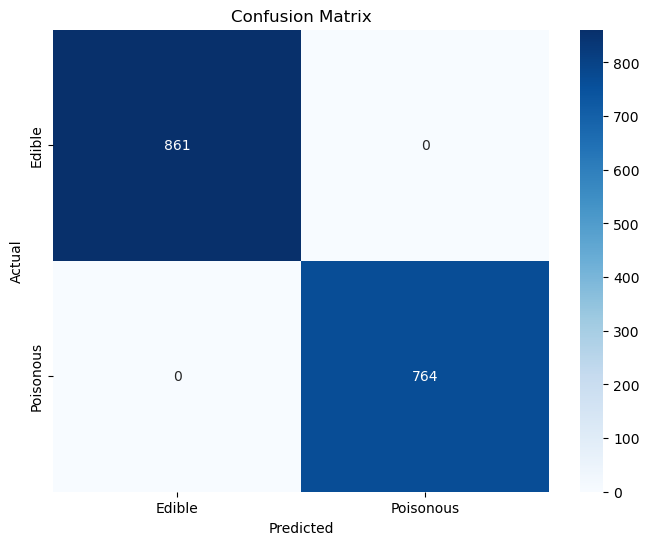

In [149]:
# plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt ='d', cmap ='Blues', xticklabels =['Edible', 'Poisonous'], yticklabels = ['Edible', 'Poisonous'])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix Breakdown:
- The True Positives (TP) are equal to 861, meaning that The model correctly predicted 861 instances as Class 0 ("edible").
- The True Negatives (TN) are equal to 764, meaning that the model correctly predicted 764 instances as Class 1 ("poisonous").
- The False Positives (FP) are equal to 0. So, The model predicted 0 instances as Class 1 that were actually Class 0 (no incorrect predictions for Class 1).
- The False Negatives (FN) are equal to 0, suggesting that The model predicted 0 instances as Class 0 that were actually Class p (no incorrect predictions for Class 0).

### 6-Create a visualization of the decision tree:

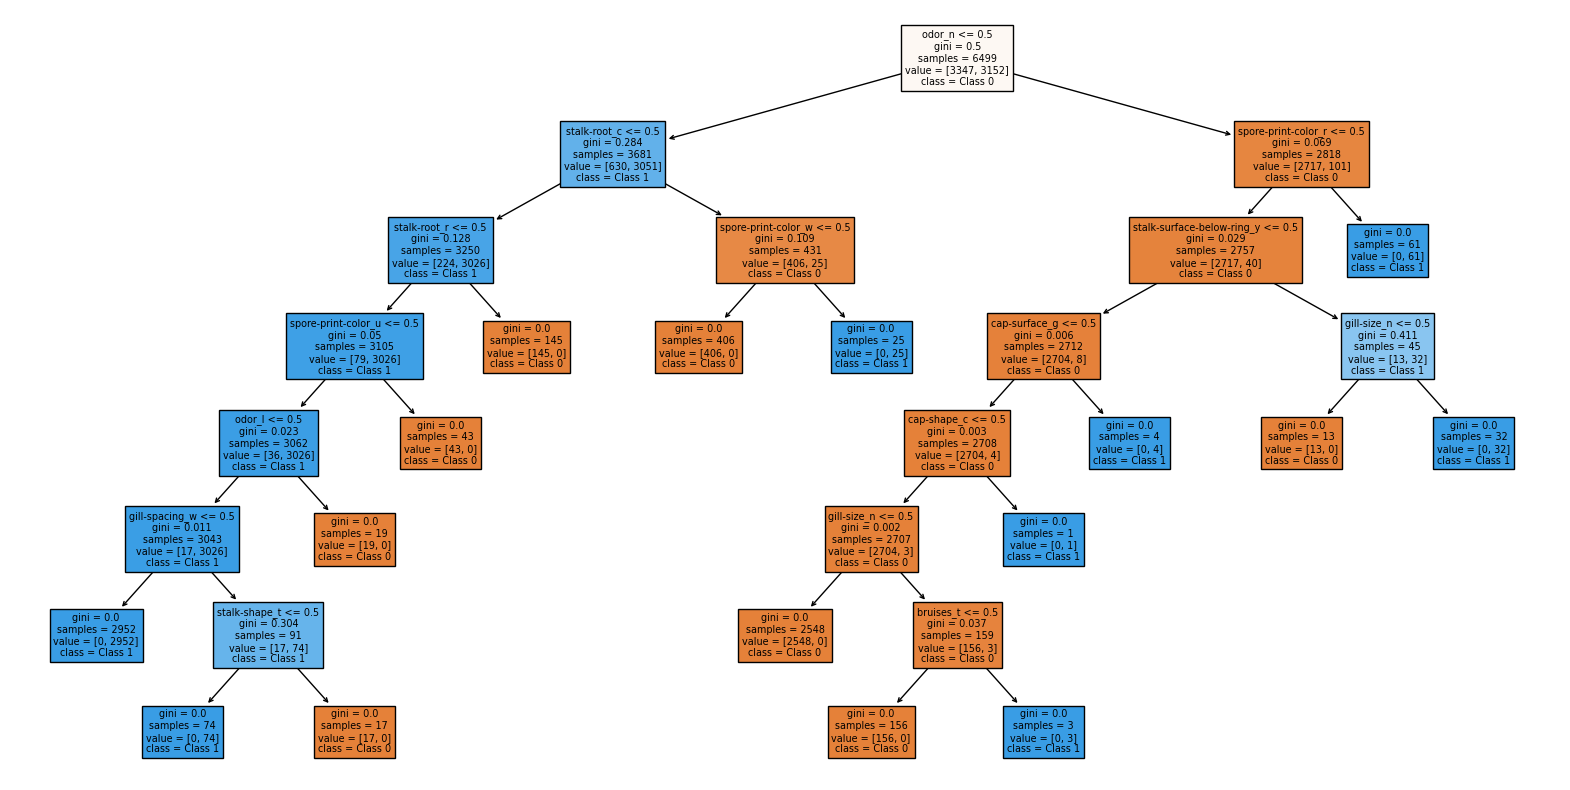

In [156]:
# import the plot_tree class from the sklearn.tree module
from sklearn.tree import plot_tree

# import matplotlib library
import matplotlib.pyplot as plt

# plot the Decision Tree model
plt.figure(figsize=(20,10)) 
plot_tree(DTC, feature_names=list(X_train.columns), class_names=['Class 0', 'Class 1'], filled=True)
plt.show()

### 7-Use a χ2-statistic selector to pick the five best features for this data:

In [157]:
# load libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# select 5 features with the highest chi_squared statistics
chi2_selector = SelectKBest(chi2, k=5)
X_kbest = chi2_selector.fit_transform(X, y)

# show results
print("Original number of features:", X.shape[1])
print("Resduced number of features:", X_kbest.shape[1])

Original number of features: 95
Resduced number of features: 5


### 8-Which five features were selected in step 7? 

In [158]:
# define the top selected features
selected_features = X.columns[chi2_selector.get_support()]
selected_features_list = list(selected_features)

# print the top selected features
print("Top 5 features selected: ", selected_features_list)

Top 5 features selected:  ['odor_f', 'odor_n', 'gill-size_n', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k']


### 9-Repeat steps 4 and 5 with the five best features selected in step 7:

In [159]:
# initialize the model
DTC_bf = DecisionTreeClassifier(random_state=42)

# train the model 
DTC_bf.fit(X_train[selected_features], y_train)

# make predictions
y_pred_bf = DTC_bf.predict(X_test[selected_features])

# calculate accuracy
accuracy_bf = accuracy_score(y_test, y_pred_bf)

# print accuracy
print(f"The accuracy of the Decision Tree Classifier model with the best features selected: {accuracy_bf:.2f}")


The accuracy of the Decision Tree Classifier model with the best features selected: 0.98


### 10-Summarizing findings:

- It seems that the Decision Tree Model using all features have achieved a perfect accuracy score, equal to 1.0 in the test set. 
This may be a sign of class imbalance. However, the confusion matrix have shown that the model has perfectly classified all instances in the test set since both values of FP and FN are zero. It correctly predicted all the 861 instances of Class 0 (edible) and all the 764 instances of Class 1 (poisonous). There are no misclassifications. 

- After selecting only the top five features, the model's performance is still very high (accuracy = 0.98) but slightly less perfect. This small drop indicates that those five features are very informative but may lack some details that the full feature set provided.
However, 0.98 accuracy with fewer features suggests that the model is generalizing better. By reducing the feature set, we may have removed noise or redundant information, leading to a more robust model that works slightly better for unseen data.